ImportError: No module named 'py35'

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis

In [68]:
#API_BASE = 'https://www.bitmex.com/api/v1/'
connector = bitmex.BitMEX(base_url=API_BASE,apiKey=API_KEY,apiSecret=API_SECRET)

#connector = bitmex.BitMEX(base_url=API_BASE)

def GetOrderBookPrice():
    queryL2 = {
    'symbol': 'XBTUSD',
    'depth' : 1,
    }

    dataL2 = pd.DataFrame(connector._curl_bitmex(path="orderbook/L2", verb="GET", query=queryL2, timeout=5))
    BuySide = dataL2.price[1]
    SellSide = dataL2.price[0]
    return BuySide
def GetOrderBookPriceEnd():
    queryL2 = {
    'symbol': 'XBTUSD',
    'depth' : 1,
    }

    dataL2 = pd.DataFrame(connector._curl_bitmex(path="orderbook/L2", verb="GET", query=queryL2, timeout=5))
    BuySide = dataL2.price[1]
    SellSide = dataL2.price[0]
    return SellSide

def Leverage(leverage):
    query = {
    'symbol': 'XBTUSD',
    'leverage' : leverage,
    }
    data = connector._curl_bitmex(path="position/leverage", verb="POST", query=query, timeout=5)

    
def BeginShort(GetOrderBookPrice, GetBalance):
    queryShort = {
        'symbol': 'XBTUSD',
        'simpleOrderQty': Balance,
        'price' : GetOrderBookPrice(),
    }
    data = connector._curl_bitmex(path="order", verb="POST", query=queryShort, timeout=5)
    
def EndShort(Balance):
    queryShort = {
        'symbol': 'XBTUSD',
        'orderQty': -1*Balance,
        'ordType': 'Market',
        'execInst': 'Close'
    }
    data = connector._curl_bitmex(path="order", verb="POST", query=queryShort, timeout=5)
#BitMEX.sell(1, 10000)

In [70]:
BeginShort(GetOrderBookPrice, -1)

In [74]:
EndShort(-1)

In [76]:
Leverage(1)

In [4]:
rsi_dl(0, 500000, '500000.csv', 3)

In [ ]:

price = np.delete(price, np.s_[k::1], 0)
print(k)


In [5]:
2**32

4294967296

In [99]:
## RSI w/ ALPHA ##
def rsi_ewma(trades):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)
    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }
    while True:
        data = pd.DataFrame(connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5))
        query['start'] += count
        if query['start'] > trades:
            break
        if len(data) < count:
            break
    data = pd.DataFrame(data.values[::-1], data.index, data.columns) # turn around data#
    close = data['close'] #close values
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))
    alpha = 0.7
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len:   
            smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len: 
            smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
            smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
            if smaloss[i] == 0:
                RSIclose[i] = 100
            else:
                RS[i] = smagain[i]/smaloss[i]
                RSIclose[i] = 100 - 100/(1+RS[i])
    RSI = RSIclose[l-1]
    return RSI


In [100]:
rsi_ewma(500)

11.39335297196024

In [88]:
## RSI w/ AsdfsdfLPHA ##
def rsi_ewms(trades):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=close"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    while True:
        data = pd.DataFrame(connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5))
        query['start'] += count
        if query['start'] > trades:
            break
        if len(data) < count:
            break
    print(data)


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16    26.829268
17     7.601740
18     7.601740
19     1.090295
20    81.277260
21    92.514834
22    94.653987
23    99.379881
24    14.416762
25     8.418822
26    85.230012
27    87.550403
28    42.762902
29     5.467819
        ...    
70     4.149782
71    80.811579
72    55.296318
73    26.941498
74     6.097389
75    61.400497
76    75.707405
77    96.409431
78    96.409431
79    99.773888
80    29.228758
81    17.262577
82    84.583779
83    45.780948
84    58.479353
85    58.479353
86     1.973978
87    79.605187
88    85.495739
89    98.963772
90    30.055204
91    26.929976
92    69.381147
93    69.381147
94    69.381147
95     0.608791
96     0.340737
97    63.907516
98    93.562536
99    77.281180
Length: 100, dtype: floa

In [11]:

wtf(0, 20000, '20000.csv', 0)

Unhandled Error: 429 Client Error: Too Many Requests for url: https://www.bitmex.com/api/v1/trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap&start=16700&count=100&reverse=true {"error":{"message":"Rate limit exceeded, retry in 2 seconds.","name":"RateLimitError"}}
Endpoint was: GET trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap


NameError: name 'exit' is not defined

In [10]:
def wtf(start, end, name, sleep):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
    count = 100  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if sleep > 0:
                time.sleep(2.1)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break


In [49]:
def pnl_alpha_X(start, end, name, alpha, sleep, leverage, low, high, X):
    


    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if sleep > 0:
                time.sleep(2.1)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            data2 = np.append(data, data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = df_all['close'] #close values
    vwap = pd.Series(df_all['vwap']) #volume-weighted price average
    lm = len(close)-1
    lp = len(close)+1
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len:   
            smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len: 
            smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
            smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
            if smaloss[i] == 0:
                RSIclose[i] = 100
            else:
                RS[i] = smagain[i]/smaloss[i]
                RSIclose[i] = 100 - 100/(1+RS[i])
               #print(RSIclose[i])
    j = 0
    k = 0
    price = np.zeros((l-15, 9))
    #pnl = 1;
    f=0
    d=0
    for i in range(15, l):
        if (RSIclose[i] < low and j == 0):
            j = 1
            price[k, 0] = close[i]
            price[k, 2] = i
            price[k, 4] = RSIclose[i]
        elif (RSIclose[i]>=high) and (j>=1):
            #mat[j,k] = RSIclose[i]
            price[k, 5] = RSIclose[i]
            price[k, 3] = i;   
            price[k, 1] = close[i]
            price[k, 8] = (1-price[k,1]/price[k,0])*100
            k = k+1
            j = 0
       # d = 1
    price = np.delete(price, np.s_[k::], 0)
    pnl = np.ones(len(price))
    pnlT = np.ones(len(price))
    X2= abs(X-1)
    for i in range(0, len(price)-1):
        pnl[i] = (1+(price[i,X]/price[i,X2]-1-.00075)*leverage)
        pnlT[i+1] = pnlT[i]*(1+(price[i,X]/price[i,X2]-1-.00075)*leverage)
        price[i, 7] = pnlT[i]
        price[i, 6] = pnl[i]
    plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
    plt.title("Boys Club Now")
    plt.legend()
    plt.show()
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    #print(min(price))
    print(np.argmax(price[:,8]))
    print(np.max(price[:,8]))
    print(np.mean(pnl))
    print(sp.stats.skew(pnl))
    print(max(pnl))
    print(min(pnl))
    print(pnlT[(len(pnlT) - 1)])
    #pdb.set_trace()g

In [52]:
pnl_alpha_X

<function __main__.pnl_alpha_X(start, end, name, alpha, sleep, leverage, low, high, X)>

In [22]:
pnl_alpha_X(0, 100000, '100000.csv', 0.3,  2.5, 10, 10, 90, 1)

NameError: name 'pnl_alpha_X' is not defined

1.0
ModeResult(mode=array([1.]), count=array([1]))
0.0


C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


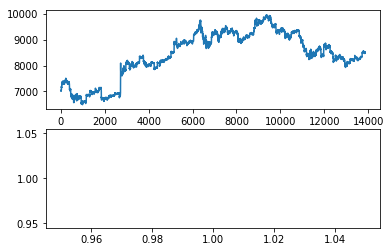

In [68]:
## just RSIalpha and PNL ##

alpha = .2
low = 10
high = 90
leverage = 10
df1 = pd.read_csv('100000.csv')
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

close = pd.Series(df_all['close']) #close values 
lm = len(close)-1
lp = len(close)+1
l = len(close)
rsi_len = 15
## RSI CLOSE ##
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
smagaina = pd.Series(np.zeros(l))
smalossa = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSIclose = pd.Series(np.zeros(l))

for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagaina[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
        smalossa[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSIclose[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])
j = 0
k = 0
price = np.zeros((l-15, 9))
#mat = np.zeros((20, 1200))
#pnl = 1;
#leverage = 10
f=0
d=0
for i in range(rsi_len, l):
    if (RSIclose[i] < low and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 4] = RSIclose[i]
    #elif  (RSIclose[i] < low and j>=1):    
    #    j = j + 1
    #    mat[j,k] = RSIclose[i]
    #elif RSIclose[i] >= low  and (RSIclose[i] <= high) and (j >= 1):
    ##    j = j + 1
     # #  mat[j,k] = RSIclose[i] 
    elif (RSIclose[i]>=high) and (j>=1):
        j = j+1
        #mat[j,k] = RSIclose[i]
        price[k, 5] = RSIclose[i]
        price[k, 3] = i  
        price[k, 1] = close[i]
        price[k, 8] = (1-price[k,1]/price[k,0])*100
        k = k+1
        j = 0
       # d = 1

   # if price[k,4] == price[k,5]:
   #     p = price[k,5]+1
   #     price[k,5] = p
   #     price[k,1] = close[p]
  #  if (RSIclose[i] >= hiS and j == 0):
 #       j = 1
 #       price[k, 0] = close[i]
 #       price[k, 2] = 1
  #  elif (RSIclose[i] <= loS) and (j>=1):
    #    j = 0 
  #     k = k+1
  #  price[k, 1] = close[i];
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X = 1
X2= abs(X-1)

for i in range(0, len(price)-1):
    pnl[i+1] = 1*(1+(price[i,X]/price[i,X2]-1-.00075)*leverage)
    pnlT[i+1] = pnlT[i]*(1+(price[i,X]/price[i,X2]-1-.00075)*leverage)
    price[i, 7] = pnlT[i]
    price[i, 6] = pnl[i]
   #f pnl[i+1] < 0.8:
       # pnlT[i+1] = 1
    #   print('No boys.')

#n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
#plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
#pdb.set_trace()
print(np.mean(pnl))
print(sp.stats.mode(pnl))
print(sp.stats.skew(pnl))
j = np.arange(1, 100000)
plt.subplot(2,1,1)
plt.plot(j, close[j], label='Boys per Time')
plt.subplot(2,1,2)
plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
plt.show()

In [50]:
sp.stats.skew(pnl)

2.0942088940419734

In [110]:
price[:,5]

array([80.37257091, 84.87879577, 70.90231099, ..., 90.97357711,
       76.78933176, 92.26714021])

In [78]:
print(price)

[[6.74300000e+03 6.74450000e+03 1.50000000e+01 ... 8.96713615e+01
  1.00000000e+00 1.00000000e+00]
 [6.73950000e+03 6.73400000e+03 1.70000000e+01 ... 9.36328952e+01
  9.98331974e-01 9.98331974e-01]
 [6.73000000e+03 6.73250000e+03 2.70000000e+01 ... 7.07220833e+01
  1.00612563e+00 1.00444739e+00]
 ...
 [9.37400000e+03 9.36600000e+03 4.34690000e+04 ... 8.35667021e+01
  9.93203625e-01 5.00318886e+01]
 [9.36500000e+03 9.35700000e+03 4.34820000e+04 ... 9.00130005e+01
  1.00640615e+00 5.03524003e+01]
 [9.35250000e+03 9.35900000e+03 4.34930000e+04 ... 9.19647031e+01
  0.00000000e+00 0.00000000e+00]]


In [80]:
np.set_printoptions(threshold=10)
print(price)

[[6.74300000e+03 6.74450000e+03 1.50000000e+01 ... 8.96713615e+01
  1.00000000e+00 1.00000000e+00]
 [6.73950000e+03 6.73400000e+03 1.70000000e+01 ... 9.36328952e+01
  9.98331974e-01 9.98331974e-01]
 [6.73000000e+03 6.73250000e+03 2.70000000e+01 ... 7.07220833e+01
  1.00612563e+00 1.00444739e+00]
 ...
 [9.37400000e+03 9.36600000e+03 4.34690000e+04 ... 8.35667021e+01
  9.93203625e-01 5.00318886e+01]
 [9.36500000e+03 9.35700000e+03 4.34820000e+04 ... 9.00130005e+01
  1.00640615e+00 5.03524003e+01]
 [9.35250000e+03 9.35900000e+03 4.34930000e+04 ... 9.19647031e+01
  0.00000000e+00 0.00000000e+00]]


In [ ]:
#print(close)

In [ ]:
print(RSIclose)

In [ ]:
np.set_printoptions(threshold=np.inf)

In [11]:
import BK
print(BK.rsi_ewma_pd(0.7))
print(BK.rsi_ewma5(500, 'fuck.csv'))

99.3201997241843
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16     20.000000
17      0.696662
18      0.064381
19     58.504093
20     31.347111
21     10.233906
22     81.787886
23     85.823665
24     96.979459
25     96.979459
26      8.031211
27     62.433953
28     82.072434
29     15.837444
         ...    
970    30.537760
971    63.115787
972    96.911753
973    96.911753
974    99.723790
975    99.723790
976    18.688850
977    57.269475
978    57.269475
979     9.130953
980    76.098868
981    76.098868
982    97.398820
983    99.737565
984    99.934342
985    99.994450
986    34.745691
987    14.726341
988     5.042301
989     5.042301
990     5.042301
991    95.364399
992    97.414110
993    39.376882
994    94.453329
995    98.623092
996    65.6973

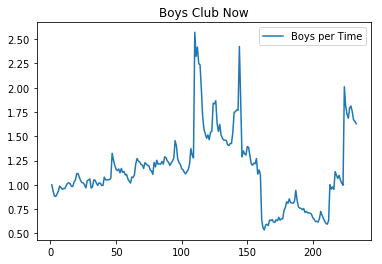

222
1.9966220291953163
1.0078307368351846
5.104474603752044
2.018649596848653
0.5790458372310561
1.629068196891738


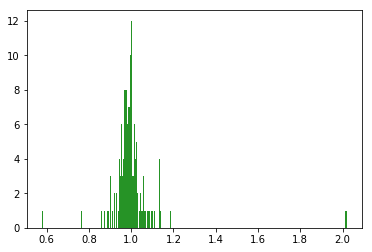

In [92]:
M = 1440
pnl_alpha(M,1440*1+M, '300.csv', 0.7, 0, 50, 30,50)

In [53]:
pnl_alpha

<function __main__.pnl_alpha(start, end, name, alpha, sleep, leverage, low, high)>

In [6]:
from lib import bitmex

In [7]:
import settings

In [125]:
p1 = len(RSIclose10000)-1
print(p1)

20499


In [9]:
connector = bitmex.BitMEX(base_url=API_BASE)

In [15]:

connector = bitmex.BitMEX(base_url=API_BASE, apiKey=API_KEY, apiSecret=API_SECRET)

In [14]:
from settings import API_KEY, API_SECRET, API_BASE

In [20]:
from bitmex import bitmex.BitMEX

SyntaxError: invalid syntax (<ipython-input-20-565361ab2d8f>, line 1)

In [12]:
def pnl_only(alpha, name, low, high, leverage):
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = df_all['close'] #close values
    vwap = pd.Series(df_all['vwap']) #volume-weighted price average
    lm = len(close)-1
    lp = len(close)+1
    l = len(close)
    rsi_len = 15
    ## RSI CLOSE ##
    change_close = pd.Series(np.zeros(l))
    gain = pd.Series(np.zeros(l))
    loss = pd.Series(np.zeros(l))
    smagain = pd.Series(np.zeros(l))
    smaloss = pd.Series(np.zeros(l))
    RS = pd.Series(np.zeros(l))
    RSIclose = pd.Series(np.zeros(l))
    for i in range(1,len(close)):   
        #print(close[i])
        change_close[i] = close[i]-close[i-1]
        if change_close[i] > 0:
            gain[i] = change_close[i]
        elif change_close[i] < 0:
            loss[i] = change_close[i]*-1
        elif change_close[i] == 0.00000:
            loss[i] = 0
            gain[i] = 0
        if i == rsi_len:   
            smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
            smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
        elif i > rsi_len: 
            smagain[i] = (1-alpha)*smagain[i-1]+(alpha)*gain[i]
            smaloss[i] = (1-alpha)*smaloss[i-1]+(alpha)*loss[i]
            if smaloss[i] == 0:
                RSIclose[i] = 100
            else:
                RS[i] = smagain[i]/smaloss[i]
                RSIclose[i] = 100 - 100/(1+RS[i])
               #print(RSIclose[i])
    j = 0
    k = 0
    price = np.zeros((l-15, 9))
    #pnl = 1;
    f=0
    d=0
    for i in range(15, l):
        if (RSIclose[i] < low and j == 0):
            j = 1
            price[k, 0] = close[i]
            price[k, 2] = i
            price[k, 4] = RSIclose[i]
        elif (RSIclose[i]>=high) and (j>=1):
            j = j+1
            #mat[j,k] = RSIclose[i]
            price[k, 5] = RSIclose[i]
            price[k, 3] = i;   
            price[k, 1] = close[i]
            price[k, 8] = (1-price[k,1]/price[k,0])*100
            k = k+1
            j = 0
           # d = 1
    price = np.delete(price, np.s_[k::], 0)
    pnl = np.ones(len(price))
    pnlT = np.ones(len(price))
    for i in range(0, len(price)-1):
        pnl[i] = (1+(price[i,S]/price[i,S]-1)*leverage)
        pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*leverage)
        price[i, 3] = pnlT[i]
        price[i, 2] = pnl[i]
    plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
    plt.title("Boys Club Now")
    plt.legend()
    plt.show()
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    #n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
    print(min(pnl))
    print(np.mean(pnl))
    print(len(close))
    #pdb.set_trace()

In [18]:
pnl_only

<function __main__.pnl_only(alpha, name, low, high, leverage)>

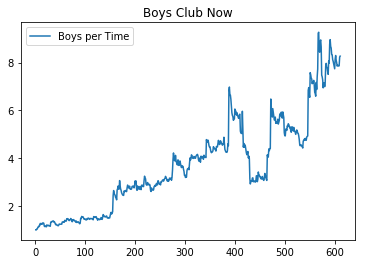

0.789522918615528
1.0047954471484013
5500


In [18]:
pnl_only(0.7, '300.csv', 30, 80, 25)

0